In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as img

file_list: ['오만석.jpg', '오만석2.jpg', '오만석3.jpg']


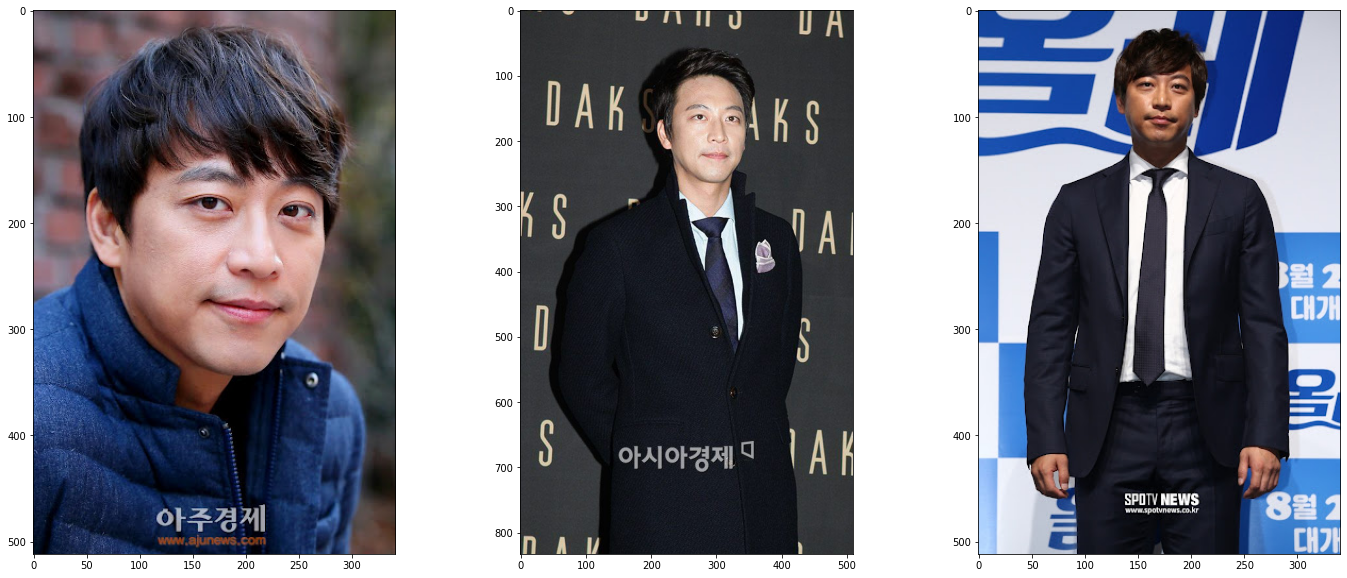

In [3]:
# 사진이 잘 나오는지 확인한다.

import os

dir_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration5/오만석'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

* face_recognition 패키지를 설치한다

In [4]:
!pip3 install face_recognition # face_recognition

     |████████████████████████████████| 100.1 MB 8.9 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=254c9143c8f9a6a0d42d444abbdc2a5df5aeaa2a3855908ecdb9423b8eba36cf
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
! sudo apt-get -y install cuda

In [ ]:
!sudo apt install cmake

In [ ]:
!pip3 install dlib

In [ ]:
!pip3 install opencv-contrib-python

* 얼굴을 잘 인식하는지 확인한다.

[(118, 315, 341, 92)]


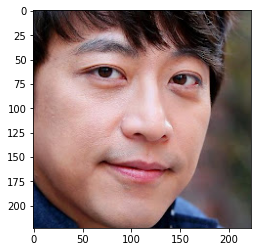

In [94]:
import dlib
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

image_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration5/오만석/오만석.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)

# face_locations = [(118, 315, 341, 92)], 리스트이다.
# face_locations[0]으로 언패킹을 진행한다.
a, b, c, d = face_locations[0]
cropped_face = image[a:c, d:b, :]

plt.imshow(cropped_face)

* 디렉토리 내의 사진을 인식하고 얼굴 영역을 잘라주는 함수를 만든다.

In [167]:
import face_recognition
import os

def get_cropped_face(image_file):
  image = face_recognition.load_image_file(image_file)
  face_locations = face_recognition.face_locations(image)
  # 예외처리
  if len(face_locations) > 0:
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c, d:b, :]
  else:
    cropped_face = [] # face_recognition으로 인식하지 못하는 파일은 [], 빈 리스트로 반환. 이후 len()을 통해 예외처리 할 예정.
  ##
  return cropped_face

* 얼굴 영역의 임베딩 벡터를 구하는 함수를 만든다.

In [17]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration5/오만석/'
image_file = os.path.join(dir_path, '오만석3.jpg') # 원본 파일 불러오기
face = get_cropped_face(image_file) # 원본 파일에서 얼굴 영역 자르기

# 잘라낸 영역의 임베딩 벡터를 구해주는 함수.

def get_face_embedding(face): 
  return face_recognition.face_encodings(face)

embedding = get_face_embedding(face)
embedding

[array([-0.00949396,  0.07614154,  0.08459707, -0.01834463, -0.17043613,
        -0.06715275, -0.05072968, -0.12752178,  0.09099467, -0.09151207,
         0.26886535, -0.07063762, -0.17114711, -0.10008228, -0.04864111,
         0.18056792, -0.13583831, -0.13158438, -0.0453418 ,  0.00252155,
         0.10065427,  0.01885813,  0.10947783,  0.02549974, -0.09484421,
        -0.33145604, -0.07786484, -0.0920782 ,  0.05878435, -0.07900228,
        -0.05473837,  0.03958558, -0.19971274, -0.09369636,  0.03838134,
         0.09978753,  0.00727089, -0.06992298,  0.15244132,  0.00306095,
        -0.25194952,  0.04523439,  0.04857676,  0.22452587,  0.17372295,
         0.09183082,  0.07354816, -0.13769826,  0.0752503 , -0.10675997,
         0.07460403,  0.05383533,  0.14952661, -0.01876964,  0.02556331,
        -0.15497798,  0.05705535,  0.10165755, -0.100629  ,  0.03715515,
         0.14210573,  0.0176012 ,  0.031692  , -0.03643266,  0.26996124,
        -0.01357854, -0.08095399, -0.13295746,  0.1

* 위에서 만든 두 함수를 연예인들 사진에 적용한다

In [173]:
import os

dir_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration5/celebrity/산들.jpeg'

os.path.splitext(dir_path)

('/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration5/celebrity/산들',
 '.jpeg')

In [180]:
# 연에인 파일 리스트 만들기

import os


def get_face_embedding_dict(dir_path):
  file_list = os.listdir(dir_path)   # '이름.확장자', 즉 '원빈.jpg'와 같은 형태로 리스트가 반환됨.

  embedding_dict_celebrity = {} # {연예인 : [임베딩] ,,,} 이런 식으로 담길 빈 디렉토리 생성
  for file in file_list:
    img_path = os.path.join(dir_path, file)   # 디렉토리에 있는 파일을 하나씩 꺼낸다.
    # image_file = os.path.join(dir_path, 'obama.jpg')
    print(img_path)
    
    face = get_cropped_face(img_path)   # 이미지를 크롭한다.
    ## 예외처리
    if len(face) > 0: # get_cropped_face()에서 얼굴 영역 인식이 안됐을 경우 0으로 출력. 이를 배제해야 함.
      embedding = get_face_embedding(face)   # 크롭한 이미지를 임베딩한다.
      if len(embedding) > 0: # 임베딩 과정에서 얼굴 인식이 안될 경우 0으로 출력됨. 이 또한 예외처리.
        embedding_dict_celebrity[os.path.splitext(file)[0]] = embedding[0] # os.path.splitext(file)은 [**, 확장자명] 이 중에서 **를 선택
    ##
        # print(embedding_dict_celebrity)
  return embedding_dict_celebrity

In [ ]:
dir_path = '/content/drive/MyDrive/Colab Notebooks/Aiffel/Exploration/Exploration5/celebrity/'

embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict

In [189]:
import numpy as np

def get_distance(name1, name2):
  return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2) # L2 distance를 이용해 임베딩 사이의 거리를 계산한다.

In [196]:
keylist = embedding_dict.keys()
print(keylist)

dict_keys(['obama', 'biden', 'bush', 'clinton', 'trump', '고창석', '야마다 타카유키', '장동건', '최준석', '이대호', '박찬호', '류현진', '박용택', '무라니시', '서강준', '박항서', '김학범', '손흥민', '윤경신', '차두리', '이동국', '기성용', '류승룡', '황병국', '하정우', '강동원', '이정재', '박보검', '차범근', '배성재', '배성우', '조승우', '유해진', '김윤석', '주진모(올드)', '권태원', '박성호', '김상호', '도지한', '이범수', '박서준', '김민재', '조달환', '공유', '방시혁', '박진영', '박재범', '지드래곤', '정형돈', '노홍철', '유재석', '이재용', '박명수', '정준하', '길', '개리', '개코', '슈퍼비', '씨잼', '스윙스', '매드클라운', '대도서관', '옥냥이', '철면수심', '이근대위', '꽈두룹', '홍구', '지민(BTS)', '돈스파이크', '목진화', '최현석', '뷔', '주호민', '이말년', '이명박', '김영삼', '김대중', '노무현', '문재인', '제이홉', 'RM', '정국', '슈가', '진', '슬리피', '줄리엔가

In [204]:
get_distance('고창석', '장동건')

0.6722526719097833

닮은 연예인 TOP5 찾기
* name1과 name2를 입력 받는다.
* name1은 미리 지정하고, name2는 호출시에 인자로 받는다.

In [200]:
def get_nearest_face(name, top=5):
  pass
get_nearest_face('trump')

In [201]:
def get_sort_key_func(name1):
  def get_distance_from_name1(name2): # name1과 name2의 거리를 계산하는 함수
    return get_distance(name1, name2)
  return get_distance_from_name1

sort_key_func = get_sort_key_func('trump')
# sort_key_func 함수는 sort_key_func('obama')라고 호출할 때 trump와 obama 사이의 임베딩 벡터 거리를 계산합니다.

In [202]:
def get_nearest_face(name, top=5):
  sort_key_func = get_sort_key_func(name)
  sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])) # 입력된 name과 딕셔너리 내 다른 사람들의 임베딩 거리를 계산한 후 오름차순으로 정렬해 key 값을 뽑습니다.

  for i in range(top+1):
    if i == 0:
      continue
    if sorted_faces[i]:
      print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))


In [216]:
get_nearest_face('박진영')

순위 1 : 이름(이대형), 거리(0.5103645615090708)
순위 2 : 이름(목진화), 거리(0.512137483689679)
순위 3 : 이름(김구라), 거리(0.5217459210013887)
순위 4 : 이름(김광현), 거리(0.5283953087893832)
순위 5 : 이름(이영하), 거리(0.530636986642394)
